## Installing the necessary libraries

In [83]:
pip install pandas textblob

In [3]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from wordcloud import WordCloud
from collections import Counter

In [2]:
pip install WordCloud

  Obtaining dependency information for WordCloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   --------------------------- ------------ 204.8/300.2 kB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 6.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Importing the data file

In [3]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


## EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


Text(0.5, 1.0, 'Rating Distribution')

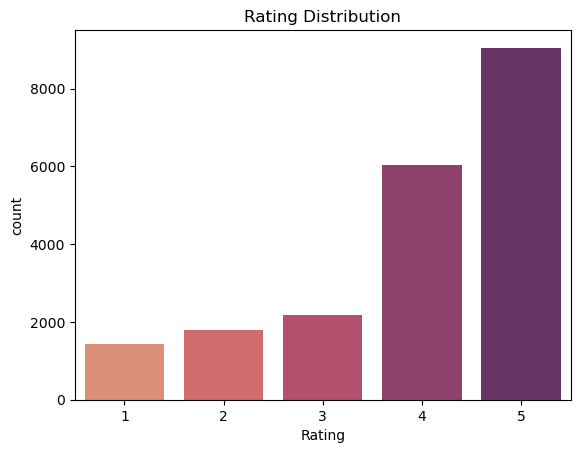

In [8]:
sns.countplot(data=df, x='Rating', palette='flare').set_title('Rating Distribution')

In [4]:
# Length of word in a sentence
df['Length'] = df['Review'].apply(len)
df.head()

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,4,593
1,ok nothing special charge diamond member hilto...,2,1689
2,nice rooms not 4* experience hotel monaco seat...,3,1427
3,"unique, great stay, wonderful time hotel monac...",5,600
4,"great stay great stay, went seahawk game aweso...",5,1281


#### Density plot showing the distribution of review lengths. It highlights how review lengths vary across different ratings.

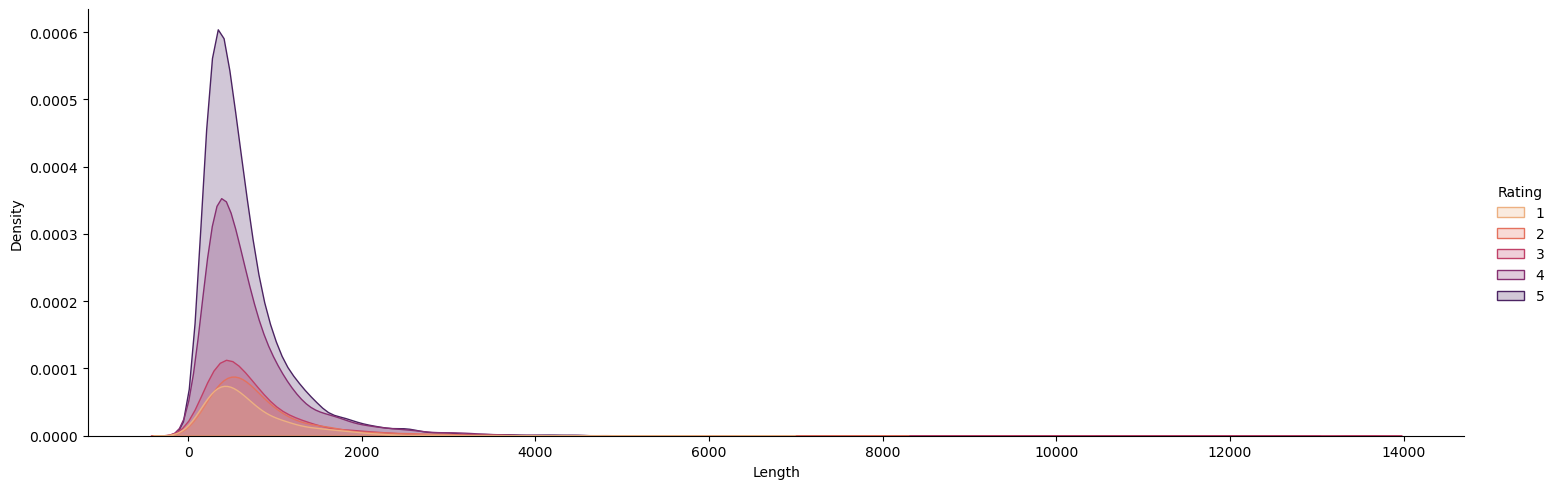

In [12]:
sns.displot(data=df, x='Length', hue='Rating', palette='flare', kind='kde', fill=True, aspect=3)

## Data Preprocessing

In [5]:
def rating(score):
    if score > 3:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

In [6]:
#Adding one more 
df['Rating'] = df['Rating'].apply(rating)

In [59]:
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,Negative
2,nice rooms not 4* experience hotel monaco seat...,Neutral
3,"unique, great stay, wonderful time hotel monac...",Positive
4,"great stay great stay, went seahawk game aweso...",Positive
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",Positive
20487,great location price view hotel great quick pl...,Positive
20488,"ok just looks nice modern outside, desk staff ...",Negative
20489,hotel theft ruined vacation hotel opened sept ...,Negative


In [23]:
# Total words in a dataset before cleaning
length = df['Length'].sum()
length

14853861

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet

In [8]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gayat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gayat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gayat\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gayat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Text Preprocessing

In [10]:
# Define preprocessing function
def preprocess_text(review):
    # Tokenization
    tokens = word_tokenize(review)
    # Lowercasing
    tokens = [token.lower() for token in tokens]
    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    stripped = [token.translate(table) for token in tokens]
    # Remove non-alphabetic tokens
    words = [word for word in stripped if word.isalpha()]
    # Filter out stop words
    stop_words = set(stopwords.words('english'))
    stop_words.remove('not')
    words = [w for w in words if not w in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized)

# Apply preprocessing to each row in the dataframe
df['Review'] = df['Review'].apply(preprocess_text)

In [11]:
df.head()

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,Positive,593
1,ok nothing special charge diamond member hilto...,Negative,1689
2,nice room not experience hotel monaco seattle ...,Neutral,1427
3,unique great stay wonderful time hotel monaco ...,Positive,600
4,great stay great stay went seahawk game awesom...,Positive,1281


In [12]:
def corpus(text):
    text_list = text.split()
    return text_list

In [13]:
df['Review_lists'] = df['Review'].apply(corpus)
df.head(10)

,Review,Rating,Length,Review_lists
0,nice hotel expensive parking got good deal sta...,Positive,593,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,Negative,1689,"[ok, nothing, special, charge, diamond, member..."
2,nice room not experience hotel monaco seattle ...,Neutral,1427,"[nice, room, not, experience, hotel, monaco, s..."
3,unique great stay wonderful time hotel monaco ...,Positive,600,"[unique, great, stay, wonderful, time, hotel, ..."
4,great stay great stay went seahawk game awesom...,Positive,1281,"[great, stay, great, stay, went, seahawk, game..."
5,love monaco staff husband stayed hotel crazy w...,Positive,1002,"[love, monaco, staff, husband, stayed, hotel, ..."
6,cozy stay rainy city husband spent night monac...,Positive,748,"[cozy, stay, rainy, city, husband, spent, nigh..."
7,excellent staff housekeeping quality hotel cho...,Positive,597,"[excellent, staff, housekeeping, quality, hote..."
8,hotel stayed hotel monaco cruise room generous...,Positive,419,"[hotel, stayed, hotel, monaco, cruise, room, g..."
9,excellent stayed hotel monaco past delight rec...,Positive,271,"[excellent, stayed, hotel, monaco, past, delig..."


In [65]:
from tqdm import trange

In [15]:
corpus = []
for i in range(df.shape[0]):  # Use range instead of trange
    corpus += df['Review_lists'][i]

len(corpus)

2032199

## Common words with their frequencies

In [16]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('hotel', 52881),
 ('room', 46337),
 ('not', 31545),
 ('great', 21115),
 ('nt', 18996),
 ('good', 17054),
 ('staff', 16275),
 ('stay', 15336),
 ('night', 13748),
 ('day', 12732)]

In [70]:
pip install rake-nltk

  Obtaining dependency information for rake-nltk from https://files.pythonhosted.org/packages/3b/e5/18876d587142df57b1c70ef752da34664bb7dd383710ccf3ccaefba2aa0c/rake_nltk-1.0.6-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


## Keyword extraction using RAKE

In [17]:
from rake_nltk import Rake

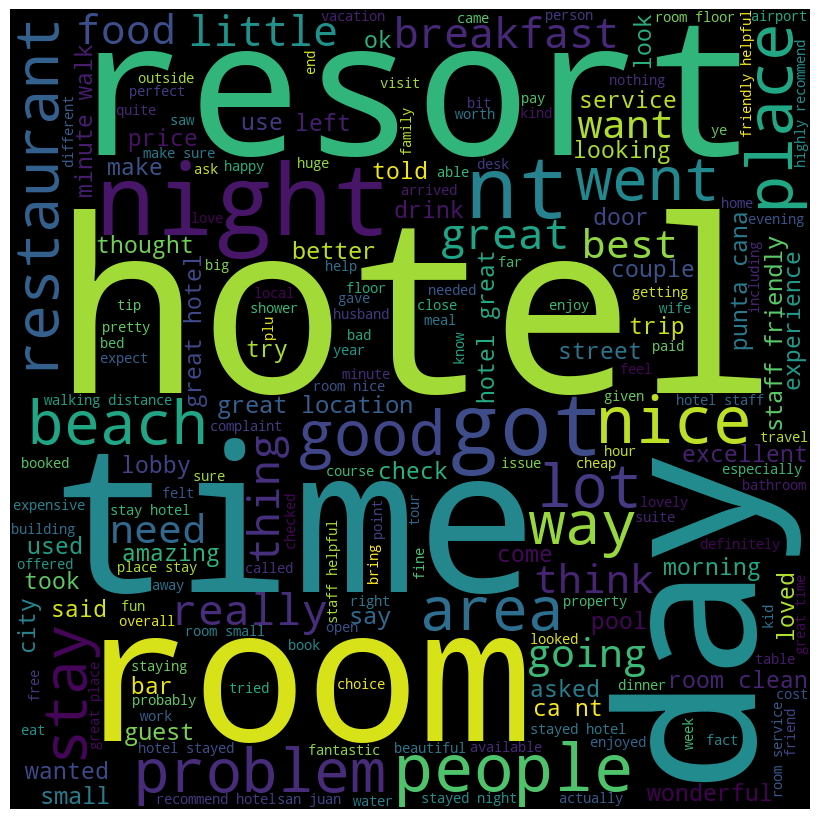

In [22]:
rake_nltk_var = Rake()

# Function to apply RAKE on a piece of text
def extract_keywords(text):
    rake_nltk_var.extract_keywords_from_text(text)
    keyword_extracted = rake_nltk_var.get_ranked_phrases()
    return keyword_extracted

# Applying the function on the DataFrame
df['keywords'] = df['Review'].apply(lambda x: extract_keywords(x))

# Concatenating all keywords for WordCloud
all_keywords = ' '.join(sum(df['keywords'].tolist(), []))

# Generating and displaying WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='black', 
                      min_font_size = 10).generate(all_keywords)

# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

In [24]:
df

,Review,Rating,Length,Review_lists,keywords
0,nice hotel expensive parking got good deal sta...,Positive,593,"[nice, hotel, expensive, parking, got, good, d...",[nice hotel expensive parking got good deal st...
1,ok nothing special charge diamond member hilto...,Negative,1689,"[ok, nothing, special, charge, diamond, member...",[suite bedroom bathroom standard hotel room to...
2,nice room not experience hotel monaco seattle ...,Neutral,1427,"[nice, room, not, experience, hotel, monaco, s...",[experience hotel monaco seattle good hotel nt...
3,unique great stay wonderful time hotel monaco ...,Positive,600,"[unique, great, stay, wonderful, time, hotel, ...",[unique great stay wonderful time hotel monaco...
4,great stay great stay went seahawk game awesom...,Positive,1281,"[great, stay, great, stay, went, seahawk, game...",[greatest area stadium activity block pike str...
...,...,...,...,...,...
20486,best kept secret time staying charm not ca nt ...,Positive,733,"[best, kept, secret, time, staying, charm, not...",[ca nt beat time stayed increased esteem bw ca...
20487,great location price view hotel great quick pl...,Positive,306,"[great, location, price, view, hotel, great, q...",[great location price view hotel great quick p...
20488,ok look nice modern outside desk staff nt part...,Negative,443,"[ok, look, nice, modern, outside, desk, staff,...",[ok look nice modern outside desk staff nt par...
20489,hotel theft ruined vacation hotel opened sept ...,Negative,5557,"[hotel, theft, ruined, vacation, hotel, opened...",[informing guest room theft completely marred ...


In [34]:
rake_nltk_var = Rake()

# Function to apply RAKE on a piece of text
def extract_keywords(text):
    rake_nltk_var.extract_keywords_from_text(text)
    keyword_extracted = rake_nltk_var.get_ranked_phrases()
    return keyword_extracted


# Function to generate and plot WordCloud
def generate_wordcloud(dataframe, sentiment):
    # Applying the function on the DataFrame
    dataframe['keywords'] = dataframe['Review'].apply(lambda x: extract_keywords(x))
    
    # Concatenating all keywords for WordCloud
    all_keywords = ' '.join(sum(dataframe['keywords'].tolist(), []))
    
    # Generating WordCloud
    wordcloud = WordCloud(width = 800, height = 800, background_color ='black', min_font_size = 10).generate(all_keywords)
    # Plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.title(f"Word Cloud for {sentiment} Comments")
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()



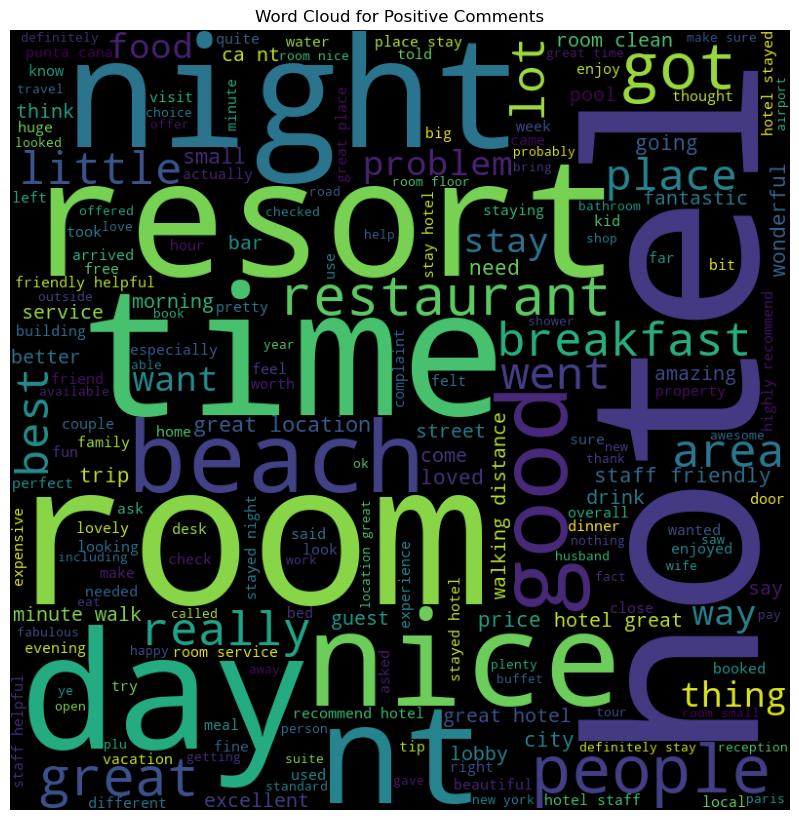

In [31]:
# Separate the DataFrame based on sentiment
df_positive = df[df['Rating'] == 'Positive'].copy()

# Generating WordClouds for Positive sentiment
generate_wordcloud(df_positive, 'Positive')

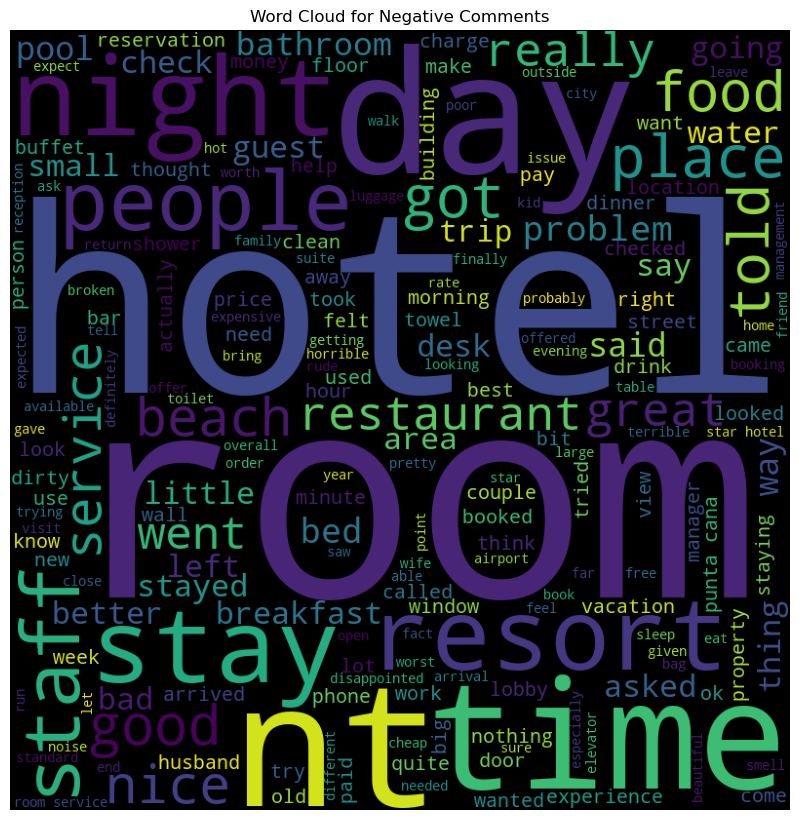

In [32]:
# Separate the DataFrame based on sentiment
df_negative = df[df['Rating'] == 'Negative'].copy()

# Generating WordClouds for Positive sentiment
generate_wordcloud(df_negative, 'Negative')

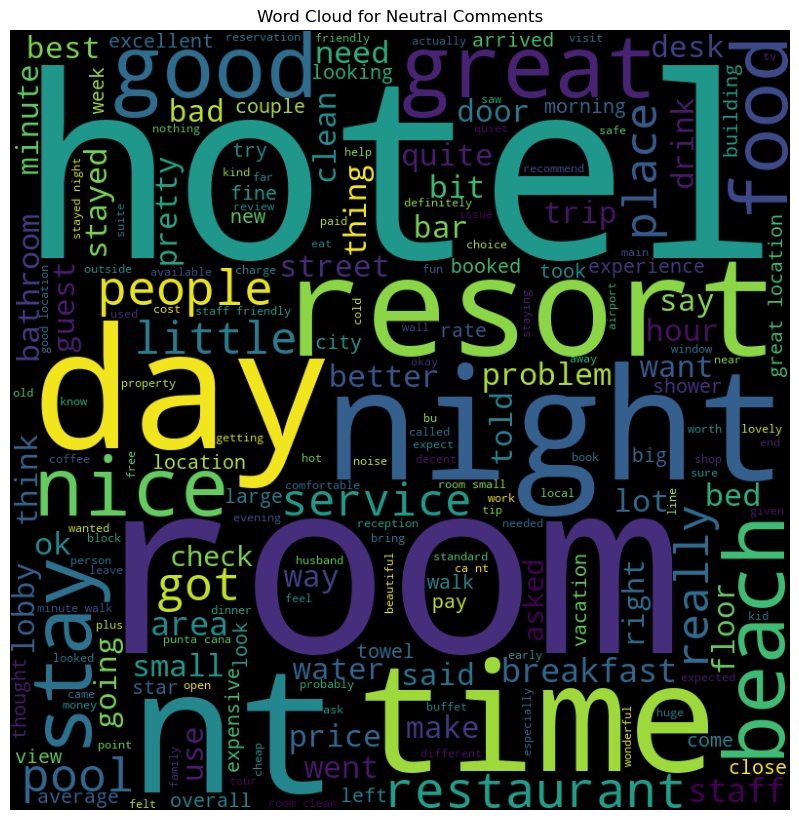

In [33]:
# Separate the DataFrame based on sentiment
df_neutral = df[df['Rating'] == 'Neutral'].copy()

# Generating WordClouds for Positive sentiment
generate_wordcloud(df_neutral, 'Neutral')

## Bag of words 

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer(max_features = 5000)

# Fit the model and transform the documents into a document-term matrix
X=vectorizer.fit_transform(df["Review"]).toarray()

# Convert the document-term matrix to an array

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()



In [73]:
# Saving BoW dictionary to later use in prediction
import pickle
bow_path = 'c1_BoW_Sentiment_Model.pkl'
pickle.dump(vectorizer, open(bow_path, "wb"))

In [60]:
df_new = df.copy(deep = True)

## Label Encoding

In [61]:
df['Rating'] = df['Rating'].map({'Positive':2, 'Negative':0,'Neutral':1})

In [64]:
y = df["Rating"]

## Splitting

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Naive Bayes Classifier

In [75]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [76]:
# Exporting NB Classifier to later use in prediction
import joblib
joblib.dump(classifier, 'c2_Classifier_Sentiment_Model') 

['c2_Classifier_Sentiment_Model']

In [77]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[ 324  279   37]
 [ 104  316   51]
 [ 349 1601 1038]]


0.409368138570383

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Decision Tree Classifier

In [79]:
# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=0)

# Fit the model on the training data
decision_tree.fit(X_train, y_train)

# Predict on the test data
y_pred = decision_tree.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Decision Tree Classifier Accuracy:  0.7348133691144182
Confusion Matrix:
 [[ 365   87  188]
 [ 104   89  278]
 [ 212  218 2558]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.57      0.55       640
           1       0.23      0.19      0.21       471
           2       0.85      0.86      0.85      2988

    accuracy                           0.73      4099
   macro avg       0.54      0.54      0.54      4099
weighted avg       0.73      0.73      0.73      4099



## Random Forest Classifier

In [80]:
# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model on the training data
random_forest.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier Accuracy:  0.8092217614052208
Confusion Matrix:
 [[ 340    0  300]
 [  41    0  430]
 [  11    0 2977]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.53      0.66       640
           1       0.00      0.00      0.00       471
           2       0.80      1.00      0.89      2988

    accuracy                           0.81      4099
   macro avg       0.56      0.51      0.52      4099
weighted avg       0.72      0.81      0.75      4099



C:\Users\gayat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gayat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gayat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
